$f_i = a_ix_i^2 + b_ix + c_i - (d_1 - d_2N\sigma)x_i$

$\nabla_1 f = 2ax + b - d_1  + d_2N\sigma$

$\nabla_2 f = d_2Nx$

$\sigma = \frac{\sum \phi}{N}$, $\phi = x$

$(a_1, ..., a_5) = (1, 0.5, 0.8, 0.7, 1.1)$

$(b_1, ..., b_5) = (12, 10, 11, 11, 13)$

$(c_1, ..., c_5) = (5, 8, 6, 9, 7)$

$(\hat{d_1}, \hat{d_2}) = (200, 0.1)$

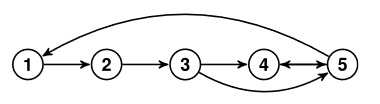

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 1000
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 0, 1/3],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 1/3],
    [0, 0, 1/3, 1/2, 1/3]
]
b = np.array(b)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = x.copy()

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)]
s_y = [[] for i in range(n)]
aa = np.array([1.0, 0.5, 0.8, 0.7, 1.1])
bb = np.array([12.0, 10.0, 11.0, 11.0, 13.0])
cc = np.array([5.0, 8.0, 6.0, 9.0, 7.0])
dd = np.array([200.0, 0.1])
xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ss[i] = sum + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    yy[i] = sum + (dd[1] * n * xx[i]) - (dd[1] * n * x[i])

def upd_x(i):
    xx[i] = x[i] - alpha * (2 * aa[i] * x[i] + bb[i] - dd[0] + dd[1] * n * z[i] + p[i])

def backup():
    global x, v, s, y, u, p, w, z
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, aa, bb, cc, dd, v, s, y, u, p, w, z
    global xx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    x = np.random.randint(70, 77, n)
    x = np.float64(x)
    # x[0] = 90.0
    # x[1] = 61.0
    # x[2] = 65.0
    # x[3] = 90.0
    # x[4] = 91.0
    v = np.ones(n)
    s = x.copy()
    y = dd[1] * n * x
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num):
    global r, ans_x
    init(1)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_x[i].append(xx[i])
            s_x[i].append(zz[i])
        backup()

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x = 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
    sum_x /= n
    for i in range(n):
        sum += aa[i] * ans_x[i][iter_num-1] ** 2 + bb[i] * ans_x[i][iter_num-1] + cc[i] - \
               (dd[0] - dd[1] * n * sum_x) * ans_x[i][iter_num-1]
    return sum

tmp = Iter_Num
solve(tmp)
print('经过%d轮迭代, 最终F(x)收敛到: ' % tmp, cal(tmp))
for i in range(n):
    print(ans_x[i][tmp-1])

经过1000轮迭代, 最终F(x)收敛到:  -35385.83719877154
56.494784510154936
114.98873548092678
71.24349140607991
81.4212043181222
50.9043409026125


x/y坐标的走势图


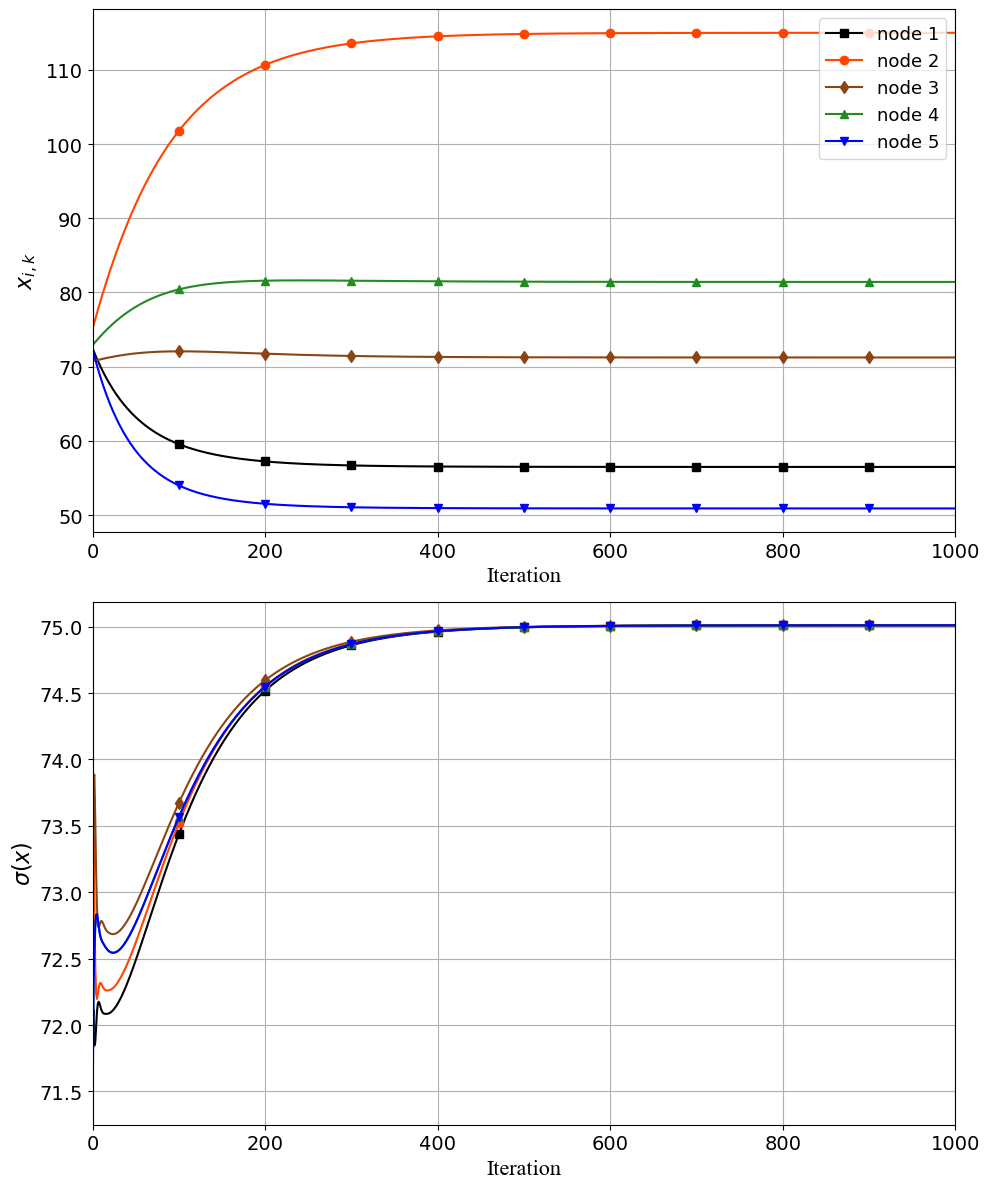

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 n, Iter_Num, ans_x, s_x 是您之前定义的变量
# 请确保它们在您的代码中正确定义并赋值

print('x/y坐标的走势图')

# 设置画布大小 (10, 12) 和子图的布局为 2 行 1 列
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 定义标记符号和颜色
markers = ['s', 'o', 'd', '^', 'v', '<', '>']
colors = ['black', 'orangered', 'saddlebrown', 'forestgreen', 'blue', 'brown', 'olive']

# 绘制第一个子图
for i in range(n):
    interval = int(Iter_Num / 10)
    markevery = list(range(interval, Iter_Num, interval))
    axs[0].plot(range(0, Iter_Num), ans_x[i], linestyle='-', linewidth=1.5, 
                markersize=6, markevery=markevery, marker=markers[i % len(markers)], 
                color=colors[i % len(colors)], label=f'node {i + 1}')

# 设置第一个子图的x/y坐标标签及字体
axs[0].set_xlabel('Iteration', fontsize=16, fontname='Times New Roman')
axs[0].set_ylabel(r'$x_{i, k}$', fontsize=16, fontname='Times New Roman')
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set_xlim(0, Iter_Num)

# 启用第一个子图的网格
axs[0].grid(True)

# 添加第一个子图的图例并设置位置
axs[0].legend(loc="upper right", fontsize=13)

# 绘制第二个子图
for i in range(n):
    interval = int(Iter_Num / 10)
    markevery = list(range(interval, Iter_Num, interval))
    axs[1].plot(range(0, Iter_Num), s_x[i], linestyle='-', linewidth=1.5, 
                markersize=6, markevery=markevery, marker=markers[i % len(markers)], 
                color=colors[i % len(colors)])

# 设置第二个子图的x/y坐标标签及字体
axs[1].set_xlabel('Iteration', fontsize=16, fontname='Times New Roman')
axs[1].set_ylabel(r'$\sigma(x)$', fontsize=16, fontname='Times New Roman')
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].set_xlim(0, Iter_Num)

# 启用第二个子图的网格
axs[1].grid(True)

# 调整布局以避免重叠
plt.tight_layout()

# 保存合并后的图为PDF文件
plt.savefig('fig8.pdf', bbox_inches='tight')
plt.show()